In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Data
The data is loaded from a CSV file named `timespends.csv`.

In [2]:
# Load the data
timespends_data = pd.read_csv('timespends.csv', header=None, names=['time_spent'])

In [3]:
timespends_data.head()

,time_spent
0,0.840000
1,0.416000
2,0.000000
3,0.749485
4,0.151163


In [4]:
timespends_data['time_spent'].value_counts()

time_spent
0.555556    2273
0.000000    2123
0.666667    1717
0.428571    1678
0.840000    1404
0.272727     385
0.111111     122
0.176072     107
0.299424     107
0.416000      60
0.005450      42
0.000342      41
0.749485      38
0.017496      37
0.066496      35
0.096535      35
0.016173      33
0.050715      28
0.002732      17
0.001368      17
0.151163      14
0.221748      11
0.008825       7
0.026018       1
0.081761       1
Name: count, dtype: int64

### Visualizing the Distribution of Time Spent
A histogram with a kernel density estimate (KDE) plot shows the distribution of time spent values.

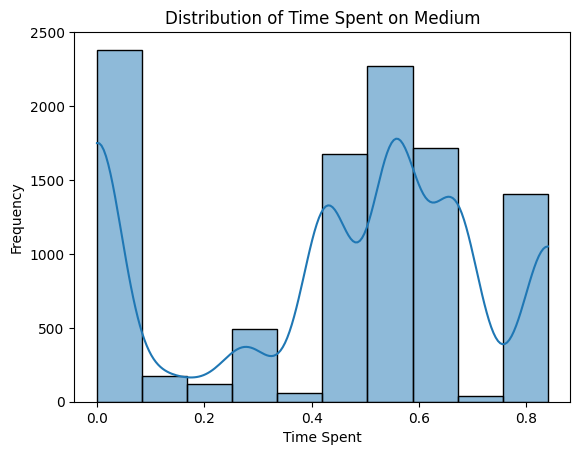

In [5]:
sns.histplot(timespends_data['time_spent'], bins=10, kde=True)
plt.xlabel("Time Spent")
plt.ylabel("Frequency")
plt.title("Distribution of Time Spent on Medium")
plt.show()

### Calculating Exposure Probability
Each user's exposure probability is calculated based on their time spent relative to the total time spent.

In [6]:
total_time_spent = timespends_data["time_spent"].sum()
timespends_data["exposure_probability"] = timespends_data["time_spent"] / total_time_spent

In [7]:
timespends_data.head()

,time_spent,exposure_probability
0,0.840000,0.000185
1,0.416000,0.000092
2,0.000000,0.000000
3,0.749485,0.000165
4,0.151163,0.000033


### Generating Impressions
Simulates a multinomial distribution to assign impressions to users based on their exposure probabilities.

In [8]:
total_impressions = 100000
impressions = np.random.multinomial(total_impressions, timespends_data["exposure_probability"])

### Visualizing the Distribution of Impressions
Plots a histogram of impressions assigned to users to understand the distribution.

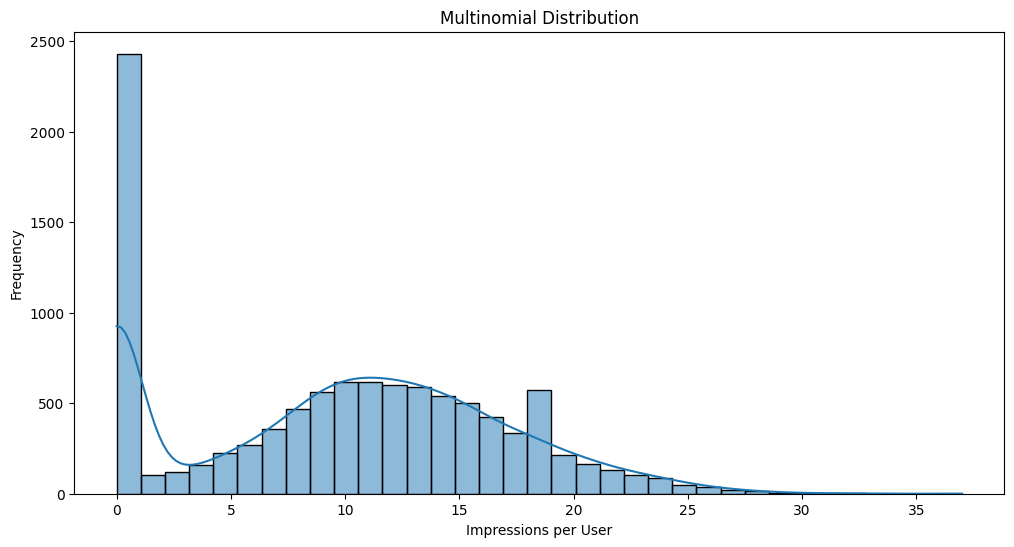

In [9]:
plt.figure(figsize=(12, 6))
sns.histplot(impressions, bins=35, kde=True)
plt.xlabel("Impressions per User")
plt.ylabel("Frequency")
plt.title("Multinomial Distribution")
plt.show()

### Calculating Cumulative Reach
Applies the reach calculation function to determine cumulative reach for different impression levels.

In [10]:
total_impressions = 100000

def calculate_reach(impressions, population_size):
    reached = (impressions > 0).sum()
    return reached / population_size

population_size = len(timespends_data)
columns = ["impressions", "reach"]
impressions_step = np.linspace(0, total_impressions, 10)

rows = []
for impressions in impressions_step:
    np.random.seed(42)
    distributed_impressions = np.random.multinomial(int(impressions), timespends_data["exposure_probability"])
    reach = calculate_reach(distributed_impressions, population_size)
    rows.append([impressions, reach])

cumulative_reach = pd.DataFrame(rows, columns=["impressions", "reach"])

In [11]:
cumulative_reach

,impressions,reach
0,0.000000,0.000000
1,11111.111111,0.559373
2,22222.222222,0.702990
3,33333.333333,0.746734
4,44444.444444,0.759508
5,55555.555556,0.766089
6,66666.666667,0.769380
7,77777.777778,0.771702
8,88888.888889,0.773541
9,100000.000000,0.775186


### Plotting Reach Curves
Visualizes cumulative reach against impressions to analyze reach performance.

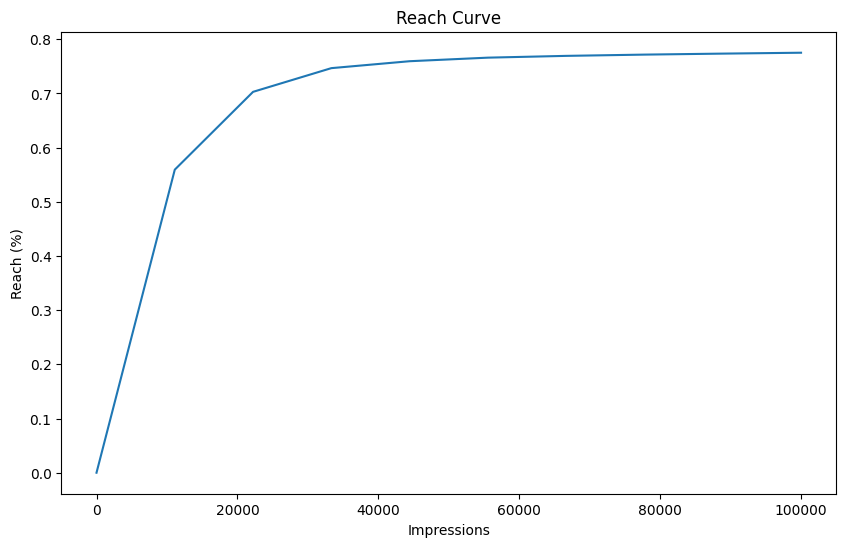

In [12]:
# Plot reach curves
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_reach, x="impressions", y="reach")
plt.ylabel("Reach (%)")
plt.xlabel("Impressions")
plt.title("Reach Curve")
plt.show()

### Try to think of: 
1. What criteria should the reach function meet (maximum and minimum value, monotonicity)?
    * It should stay between 0 and 1, and be monotonically increasing. Also it should be asymptotic to 1 and based on distribution of time spent non-linearly increasing.
2. How would you map the distribution of impressions among people and why?
    * I would use a multinomial distribution to map the distribution of impressions among people, because it allows for multiple outcomes and the probabilities of each outcome are independent of each other.
3. What is the relationship between time-spends and the expected values of impressions received for given people?
    * Expected impressions are proportional to each individual’s time spent, since higher “exposure_probability” leads to a correspondingly higher expected number of impressions.